# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [29]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/states_edu.csv')
df["YEAR"].nunique()
df.dropna()
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [21]:
print("Michigan: " + str(df[df['STATE'] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()))
print("Ohio: " + str(df[df['STATE'] == "OHIO"]["AVG_MATH_4_SCORE"].mean()))

Michigan: 234.36363636363637
Ohio: 239.45454545454547


Find the average for your chosen test across all states in 2019

In [22]:
df_year = df[df['YEAR'] == 2019]
average_test_score = df_year[['AVG_MATH_4_SCORE']].mean().mean()
print(f"The average test score across all tests in {2019} is: {average_test_score}")

The average test score across all tests in 2019 is: 239.9433962264151


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [24]:
max_test_scores_by_state = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()
max_test_scores_info = df.loc[df.groupby('STATE')['AVG_MATH_4_SCORE'].idxmax()]
print(max_test_scores_info[['STATE', 'AVG_MATH_4_SCORE', 'YEAR']])

                     STATE  AVG_MATH_4_SCORE  YEAR
1071               ALABAMA             233.0  2013
766                 ALASKA             237.0  2007
1073               ARIZONA             240.0  2013
1074              ARKANSAS             240.0  2013
1666            CALIFORNIA             235.0  2019
1076              COLORADO             247.0  2013
873            CONNECTICUT             245.0  2009
1078              DELAWARE             243.0  2013
1670  DISTRICT_OF_COLUMBIA             235.0  2019
1671                 DODEA             250.0  2019
1344               FLORIDA             246.0  2017
1081               GEORGIA             240.0  2013
1082                HAWAII             243.0  2013
675                  IDAHO             242.0  2005
982               ILLINOIS             239.0  2011
1085               INDIANA             249.0  2013
1086                  IOWA             246.0  2013
781                 KANSAS             248.0  2007
1190              KENTUCKY     

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [99]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = (df['SUPPORT_SERVICES_EXPENDITURE'] / df['AVG_MATH_4_SCORE'])
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'],
      dtype='object')

Feature engineering justification: **<larger states would logically spend more money on education because states have different populations, so the expenditure per student section will help to give an idea how much the state is spending per student, which we can factor into our assessment of the data. \>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Distribution of 4th Grade Math Scores'}, ylabel='Frequency'>

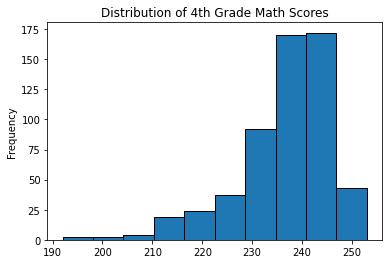

In [33]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")

**<Change in 4th grade math scores over time>**

**Visualization 2**

Text(0.5, 1.0, '4th Grade Math Score Over Time')

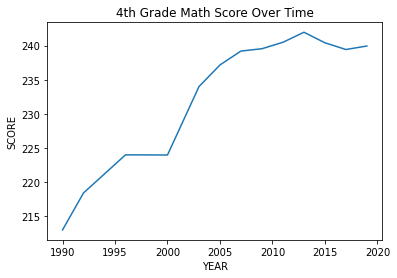

In [40]:
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Math Score Over Time')

**<>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [101]:
from sklearn.model_selection import train_test_split

In [127]:
# X =
# y =
X = df[['LOCAL_REVENUE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y = y.fillna(y.median())

In [128]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'],
      dtype='object')

In [129]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [130]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [131]:
# create your model here
# model = 
model = LinearRegression()

In [132]:
model.fit(X_train, y_train)

LinearRegression()

In [133]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [134]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)
np.mean(np.abs(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5

39.524564796856765
[5.49786310e-08 8.98063833e-01]


5.8685515507440575

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

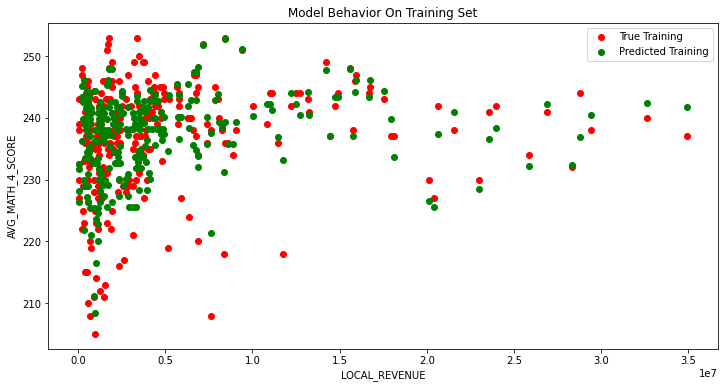

In [136]:
col_name = 'LOCAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<My model was supposed to find out if local revenue was a good predictor of the average math scores for students in grade 4 of the different states. the diistribution of the model does not appear to be a good predictor of the average math score in grade 4 across the country, as well as showing that local revenue and the math scores for grade 4 were not well correlated.>**